In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as ps

In [3]:
data = ps.read_csv("../data/multiphase/results.csv")

In [4]:
data.describe()

,ID,H_em,P_cl,T_ICM,T_cl,Z_cl,beta_cl,chisq,cloud_Rin,cloud_Rout,...,grid_rnd_seed,id,n_HI_ICM,n_HI_cl,r_cl,r_gal,sigma_cl,sigma_i,vinf_cl,zeta_Z
count,2488.000000,2488.000000,2488.000000,2.488000e+03,2488.000000,2488.000000,2488.000000,2488.000000,2488.0,2488.0,...,2488.0,2488.000000,2.488000e+03,2488.000000,2488.000000,2488.0,2488.000000,2488.000000,2488.000000,2488.000000
mean,1243.500000,1751.326718,0.503793,1.003851e+07,19765.405626,0.273294,1.812311,860.619135,0.0,5000.0,...,123456.0,1243.500000,7.824821e-08,0.624261,115.141952,5000.0,52.347079,52.405229,403.213443,0.014685
std,718.368058,719.642994,0.290414,1.238160e+07,12517.563531,0.254519,0.408114,960.596762,0.0,0.0,...,0.0,718.368058,1.866427e-07,0.731703,49.115420,0.0,27.264105,27.270420,230.905401,0.022529
min,0.000000,501.423700,0.000239,3.000902e+05,5008.272000,0.030007,1.100000,38.638837,0.0,5000.0,...,123456.0,0.000000,1.005050e-12,0.030072,30.036630,5000.0,0.000000,5.029782,0.000000,0.000100
25%,621.750000,1136.036250,0.257945,1.113740e+06,9150.848250,0.070621,1.460000,355.792811,0.0,5000.0,...,123456.0,621.750000,3.505727e-11,0.090140,72.363635,5000.0,28.564707,28.462385,205.757975,0.000627
50%,1243.500000,1733.591500,0.498750,4.183082e+06,16161.255000,0.165121,1.820000,593.984932,0.0,5000.0,...,123456.0,1243.500000,1.174529e-09,0.291594,114.176400,5000.0,52.302395,51.810935,398.557600,0.003414
75%,1865.250000,2365.887500,0.754240,1.489513e+07,28610.990000,0.412259,2.170000,1062.118310,0.0,5000.0,...,123456.0,1865.250000,3.257601e-08,0.912260,158.348575,5000.0,75.712417,75.430875,608.059750,0.017760
max,2487.000000,2998.644000,0.999992,4.977452e+07,49941.730000,0.998844,2.500000,18551.424190,0.0,5000.0,...,123456.0,2487.000000,9.980237e-07,2.996807,199.968800,5000.0,99.997650,99.964350,799.663300,0.099932


In [5]:
n_best  = 5
chisq = data.chisq
sorted_id = argsort(chisq)
best_models = data.loc[sorted_id[:n_best]]
print chisq[sorted_id[:n_best]]

chisq
791     38.638837
977     47.331794
546     53.315136
2379    58.843287
1219    62.468029
Name: chisq, dtype: float64


In [6]:
best_models.describe()

,ID,H_em,P_cl,T_ICM,T_cl,Z_cl,beta_cl,chisq,cloud_Rin,cloud_Rout,...,grid_rnd_seed,id,n_HI_ICM,n_HI_cl,r_cl,r_gal,sigma_cl,sigma_i,vinf_cl,zeta_Z
count,5.000000,5.000000,5.000000,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.0,5.0,...,5.0,5.000000,5.000000e+00,5.000000,5.000000,5.0,5.000000,5.000000,5.000000,5.000000
mean,1182.400000,1892.919200,0.619955,5.241627e+06,18147.653800,0.068656,1.708000,52.119416,0.0,5000.0,...,123456.0,1182.400000,5.240572e-08,0.843177,139.383506,5000.0,64.402954,64.009844,49.905483,0.019691
std,713.018092,659.378683,0.348997,2.664319e+06,10297.109559,0.026756,0.430023,9.465481,0.0,0.0,...,0.0,713.018092,2.885664e-08,1.133849,67.274330,0.0,8.358648,30.897117,30.897834,0.026424
min,546.000000,1179.270000,0.120166,2.237526e+06,6526.299000,0.038303,1.100000,38.638837,0.0,5000.0,...,123456.0,546.000000,1.007189e-08,0.035852,36.079430,5000.0,54.318020,22.725290,6.467606,0.000118
25%,791.000000,1651.007000,0.400013,3.955738e+06,13309.680000,0.048739,1.600000,47.331794,0.0,5000.0,...,123456.0,791.000000,3.524805e-08,0.244009,107.505700,5000.0,61.039130,49.279350,43.200780,0.000472
50%,977.000000,1771.094000,0.799384,4.622817e+06,16125.880000,0.064506,1.600000,53.315136,0.0,5000.0,...,123456.0,977.000000,6.843333e-08,0.277870,174.081100,5000.0,63.781550,58.911000,52.468920,0.007284
75%,1219.000000,1894.918000,0.816368,6.070426e+06,20650.370000,0.090999,2.060000,58.843287,0.0,5000.0,...,123456.0,1219.000000,6.950927e-08,0.862612,180.599400,5000.0,65.646840,93.211530,54.350240,0.028322
max,2379.000000,2968.307000,0.963844,9.321629e+06,34126.040000,0.100736,2.180000,62.468029,0.0,5000.0,...,123456.0,2379.000000,7.876607e-08,2.795542,198.651900,5000.0,77.229230,95.922050,93.039870,0.062258


5 0.673649321916 0.43929688392
10 0.831936047376 0.637993712635
15 0.877380296785 0.713807142911


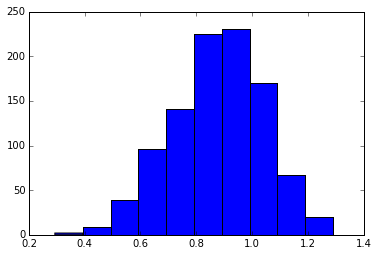

In [7]:
n_items = [5,10,15]

for n_i in n_items:
    n_try = 1000
    frac = np.zeros(n_try)
    for i in range(n_try):
        x_all = np.linspace(0.0,1.0,2500)
        x_some = random.random(n_i)
        q_all  = percentile(x_all, q=[16,50,84])
        q_some = percentile(x_some, q=[16,50,84])
        frac[i] = (q_some[2]-q_some[0])/(q_all[2]-q_all[0])
    print n_i, mean(frac), mean(frac) - std(frac)
a = hist(frac)


In [8]:
column_log= ['T_ICM', 'n_HI_ICM', 'T_cl', 'n_HI_cl', 'zeta_Z']
column_lin = ['H_em', 'P_cl', 'f_cl', 'sigma_i', 'beta_cl', 'sigma_cl', 'vinf_cl', 'r_cl']
columns = []
change = [] 
values = []
for column in data:
    if column in column_log:
        print "----"
        print column
        best_q = np.log10(best_models[column].quantile([0.16,0.50,0.84]))
        all_q = np.log10(data[column].quantile([0.16,0.50,0.84]))
        delta_all = all_q.values[2] - all_q.values[0]
        delta_best = best_q.values[2] - best_q.values[0]
        print delta_best/delta_all
        print best_q.values
        change.append(delta_best/delta_all)
        columns.append(column)
        values.append(best_q.values)
    if column in column_lin:
        print "----"
        print column
        best_q = (best_models[column].quantile([0.16,0.50,0.84]))
        all_q = (data[column].quantile([0.16,0.50,0.84]))
        delta_all = all_q.values[2] - all_q.values[0]
        delta_best = best_q.values[2] - best_q.values[0]
        print delta_best/delta_all
        print best_q.values
        change.append(delta_best/delta_all)
        columns.append(column)
        values.append(best_q.values)
        #print column


----
H_em
0.469955769969
[ 1481.18168  1771.094    2281.33804]
----
P_cl
0.83369472852
[ 0.29926839  0.7993842   0.86945951]
----
T_ICM
0.22445752282
[ 6.52337985  6.6649067   6.8597901 ]
----
T_cl
0.54942926117
[ 4.03613616  4.20752342  4.40656762]
----
beta_cl
0.711666666667
[ 1.42    1.6     2.1032]
----
f_cl
0.29675167451
[ 2.04778051  3.01804366  3.50512314]
----
n_HI_ICM
0.108554674233
[-7.58195352 -7.16473233 -7.13761982]
----
n_HI_cl
0.716638456542
[-0.77192707 -0.55615865  0.19269761]
----
r_cl
0.899019917372
[  81.7922428  174.0811     187.0983   ]
----
sigma_cl
0.174784770016
[ 58.6195304  63.78155    69.8165004]
----
sigma_i
0.851767499901
[ 39.7198884  58.911      94.1873172]
----
vinf_cl
0.0705616037335
[ 29.97683736  52.46892     68.2785068 ]
----
zeta_Z
1.00690113898
[-3.4624546  -2.13765501 -1.39212802]


In [9]:
ii = argsort(change)
for i in ii:
    print columns[i], values[i], change[i]

vinf_cl [ 29.97683736  52.46892     68.2785068 ] 0.0705616037335
n_HI_ICM [-7.58195352 -7.16473233 -7.13761982] 0.108554674233
sigma_cl [ 58.6195304  63.78155    69.8165004] 0.174784770016
T_ICM [ 6.52337985  6.6649067   6.8597901 ] 0.22445752282
f_cl [ 2.04778051  3.01804366  3.50512314] 0.29675167451
H_em [ 1481.18168  1771.094    2281.33804] 0.469955769969
T_cl [ 4.03613616  4.20752342  4.40656762] 0.54942926117
beta_cl [ 1.42    1.6     2.1032] 0.711666666667
n_HI_cl [-0.77192707 -0.55615865  0.19269761] 0.716638456542
P_cl [ 0.29926839  0.7993842   0.86945951] 0.83369472852
sigma_i [ 39.7198884  58.911      94.1873172] 0.851767499901
r_cl [  81.7922428  174.0811     187.0983   ] 0.899019917372
zeta_Z [-3.4624546  -2.13765501 -1.39212802] 1.00690113898


```
Results for N=5 best
vinf_cl [ 29.97683736  52.46892     68.2785068 ] 0.0705616037335
n_HI_ICM [-7.58195352 -7.16473233 -7.13761982] 0.108554674233
sigma_cl [ 58.6195304  63.78155    69.8165004] 0.174784770016
T_ICM [ 6.52337985  6.6649067   6.8597901 ] 0.22445752282
f_cl [ 2.04778051  3.01804366  3.50512314] 0.29675167451

H_em [ 1481.18168  1771.094    2281.33804] 0.469955769969
T_cl [ 4.03613616  4.20752342  4.40656762] 0.54942926117

beta_cl [ 1.42    1.6     2.1032] 0.711666666667
n_HI_cl [-0.77192707 -0.55615865  0.19269761] 0.716638456542
P_cl [ 0.29926839  0.7993842   0.86945951] 0.83369472852
sigma_i [ 39.7198884  58.911      94.1873172] 0.851767499901
r_cl [  81.7922428  174.0811     187.0983   ] 0.899019917372
zeta_Z [-3.4624546  -2.13765501 -1.39212802] 1.00690113898


Results for best N=10 
vinf_cl [ 11.77492296  48.606605    88.2894364 ] 0.140959567981
sigma_cl [ 57.0310768  62.41034    74.3336384] 0.270093092145
T_ICM [ 6.42311563  6.67298056  6.97551694] 0.368569716575
n_HI_ICM [-9.22481664 -8.04416023 -7.16092528] 0.504227014347
zeta_Z [-2.62977871 -2.13155433 -1.50638592] 0.546360892923

sigma_i [ 53.517276  73.72816   95.91985 ] 0.6630960051
f_cl [ 2.75050651  4.31840369  6.33245614] 0.729375186298
T_cl [ 3.79169646  4.16784231  4.33223337] 0.801732094508
beta_cl [ 1.348   1.84    2.1316] 0.81625

H_em [ 1151.44036  1711.0505   2567.0448 ] 0.831426840839
P_cl [ 0.24329905  0.78809165  0.8143268 ] 0.834917995006
n_HI_cl [-1.16447244 -0.58346042  0.11720057] 0.952179834709
r_cl [  48.5231096   92.220695   177.731348 ] 1.1030778561

Results for best N=15

vinf_cl [ 18.7711492  49.66307    90.4487244] 0.132048673903
sigma_cl [ 58.9402688  67.01852    77.1646388] 0.284482526893
f_cl [ 3.03528492  4.49425009  5.99339146] 0.602345017725
T_ICM [ 6.13373144  6.68090706  7.19195491] 0.70606119688

n_HI_ICM [-10.62672789  -8.2248358   -7.2184682 ] 0.832668152695

r_cl [  63.6046088   93.53885    165.516676 ] 0.870044712237
zeta_Z [-3.29358593 -2.28724828 -1.49247934] 0.875966280042
n_HI_cl [-1.02255957 -0.55615865  0.16716718] 0.883871163017
H_em [ 1149.72156  1771.094    2696.42284] 0.908423937235
T_cl [ 3.83845661  4.20752342  4.50145978] 0.983375817919
sigma_i [ 29.0982644  70.975      95.2677252] 1.0347651328
beta_cl [ 1.258   1.8     2.2636] 1.0475
P_cl [ 0.18732971  0.7922047   0.9320748 ] 1.0889156849
```

from astropy.constants import G, M_sun, kpc, k_B, m_p
from astropy.cosmology import default_cosmology
from barak import virial

z = 0.0
mass = 2.5E13
mu = 0.59
km = 1e5
cosmo = default_cosmology.get()
rho_virial = virial.deltavir(z, cosmo=cosmo) * cosmo.critical_density(z)
M_g = mass * M_sun.cgs
rvir = ((3 * M_g) / (4 * pi * rho_virial))**(1./3)
print rvir.to('kpc')
vcirc = np.sqrt(G.cgs * M_g / rvir)
print vcirc.to('km/s')
Tvir = mu * m_p.cgs * vcirc * vcirc / (2 * k_B.cgs)
print Tvir.to('Kelvin')/(10**6.68)